# Distribution des naissances dans le temps
Dans ce carnet est proposée une analyse de la dstribution dans le temps des années de naissance des militant.es pour le droit des femmes, les droits humains, LGBTQIA+ et le climat. Le but est de mette en évidence la proportion de militant.es par générations.
De plus, la proportion des genres dans l'implciation militante sera aussi mise en lumière.

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from fanalysis.ca import CA 
from fanalysis.mca import MCA
# Importation du fichier csv qui se trouve dans le même dossier que le notebook
data = pd.read_csv("analyse_geo_personne.csv")

In [105]:
display(data)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817
3,http://www.wikidata.org/entity/Q255221,Táhirih,F,Asie,1817
4,http://www.wikidata.org/entity/Q43302262,Violante Atabalipa Ximenes de Bivar e Vellasco,F,Amérique du sud,1817
...,...,...,...,...,...
6140,http://www.wikidata.org/entity/Q60451813,Rukshana Kapali,LGBTQ,Asie,1999
6141,http://www.wikidata.org/entity/Q60614820,Kyra Gantois,F,Europe,1999
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999


# Premier graphique sur l'année de naissance et le nombre de personnes


In [106]:
# l'année de naissance est déjà de type int donc pas besoin de changer le type de la donnée
data["annee_naissance"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6145 entries, 0 to 6144
Series name: annee_naissance
Non-Null Count  Dtype
--------------  -----
6145 non-null   int64
dtypes: int64(1)
memory usage: 48.1 KB


In [107]:
data.dtypes

pk                 object
nom                object
gender             object
zone_geo           object
annee_naissance     int64
dtype: object

In [108]:
data["annee_naissance"].count()

6145

In [109]:
annee_eff= pd.DataFrame(data[data['annee_naissance'] < 2001].groupby('annee_naissance').size())\
                .reset_index(drop=False)
annee_eff.columns=['year','effectif']
annee_eff

,year,effectif
0,1816,1
1,1817,4
2,1818,5
3,1819,5
4,1820,4
...,...,...
179,1995,33
180,1996,25
181,1997,20
182,1998,22


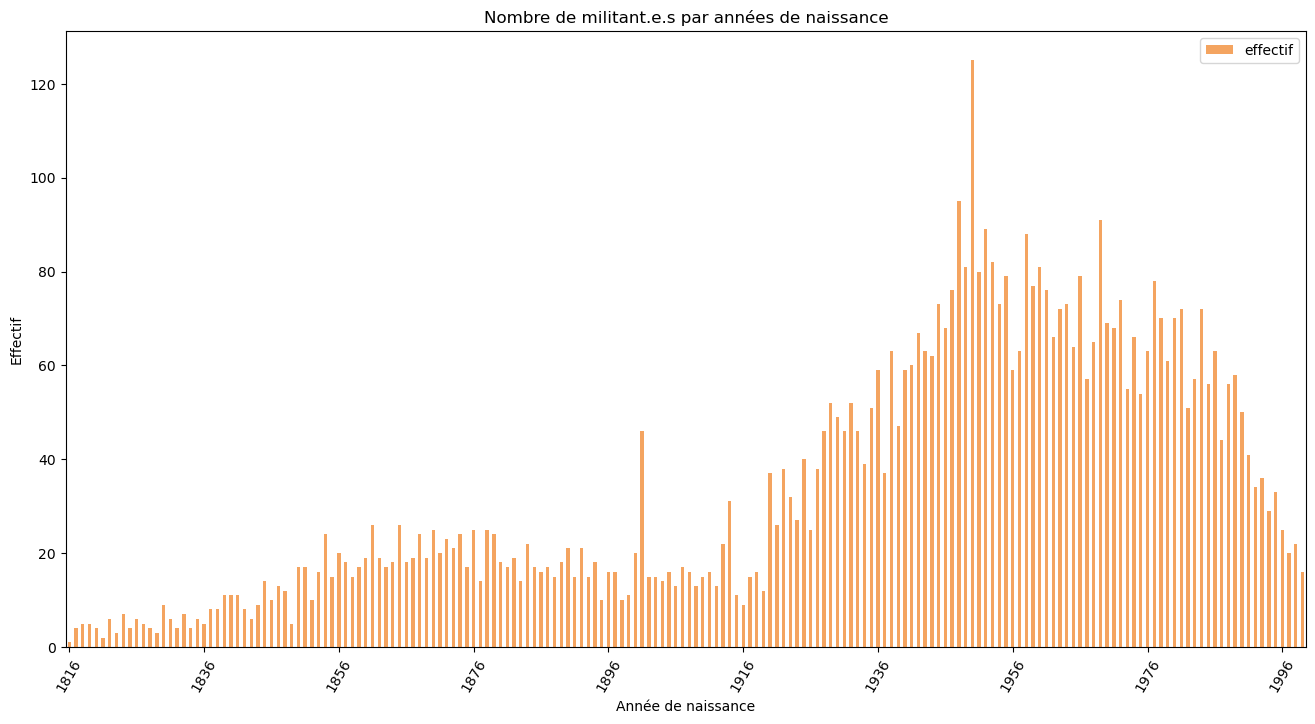

In [110]:
# Premier graphique
graph1 = annee_eff.plot(x="year", y="effectif", kind= "bar",rot=60, fontsize=10, figsize=(16,8),color=['sandybrown'])


max_xticks = 10
xloc = plt.MaxNLocator(max_xticks)
graph1.xaxis.set_major_locator(xloc)

plt.ylabel('Effectif')
plt.xlabel('Année de naissance')
plt.title("Nombre de militant.e.s par années de naissance")
plt.show()

## Code pour faire un graphique par génération

In [111]:
### Créer une copie indépendante du DataFrame (attention aux copies de variables qui sont seulement des alias) 
cdf_p = data[data['annee_naissance'] < 2001].copy(deep=True)

In [112]:
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817


In [113]:
### Année minimale et maximale dans la population
min(cdf_p['annee_naissance']), max(cdf_p['annee_naissance'])

(1816, 1999)

In [114]:
### Créer une liste d'années pour séparer en périodes de 25 ans
# noter que la dernière année sera exclue, 
# elle donc doit être supérieure à la valeur maximale 
l_25 = list(range(1816, 2017, 25))
l_25[:5],l_25[-5:]

([1816, 1841, 1866, 1891, 1916], [1916, 1941, 1966, 1991, 2016])

In [115]:
### fonction pd.cut : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
# On ajoute une nouvelle colonne qui contient la période sur la base de la liste précédente
# et de la valeur de l'année

cdf_p['periodes'] = pd.cut(cdf_p['annee_naissance'], l_25, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['periodes'] = cdf_p['periodes'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840


In [116]:
cdf_p[cdf_p.annee_naissance == 1999][:3]

,pk,nom,gender,zone_geo,annee_naissance,periodes
6129,http://www.wikidata.org/entity/Q105622678,Samantha Hudson,LGBTQ,Europe,1999,1991-2015
6130,http://www.wikidata.org/entity/Q107037238,Zhiar Ali,M,Europe,1999,1991-2015
6131,http://www.wikidata.org/entity/Q108871752,Benja Apan,F,Asie,1999,1991-2015


In [117]:
### compter les naissances par périodes de 25 ans
cdf_p.groupby(by='periodes').size()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/3799892700.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cdf_p.groupby(by='periodes').size()


periodes
1816-1840     138
1841-1865     382
1866-1890     492
1891-1915     425
1916-1940     961
1941-1965    1892
1966-1990    1599
1991-2015     256
dtype: int64

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/4144223239.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']


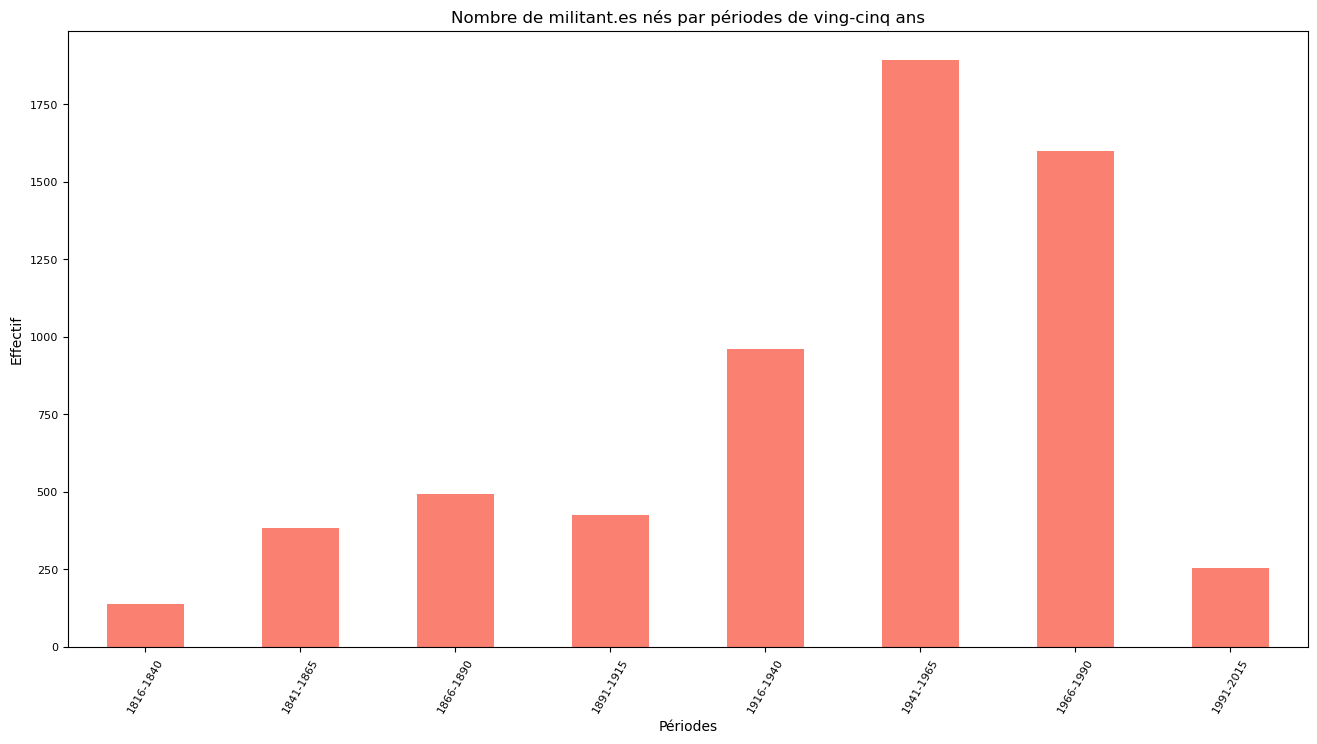

In [118]:
ax = cdf_p.groupby(by='periodes').size().plot(kind='bar',rot=60, fontsize=8, figsize=(16,8),color=['salmon']
)
plt.ylabel('Effectif')
plt.xlabel('Périodes')
plt.title('Nombre de militant.es nés par périodes de ving-cinq ans')
plt.show()

## Représentation par genre

In [119]:
### Regrouper et compter avec un fitre sur le genre féminin
# Je ne sais pas pourquoi y a des générations qui disparaissent !!!!
gender_m = pd.DataFrame(cdf_p[cdf_p.gender == 'M'].groupby('periodes').size())
gender_m.columns = ['gen_m']
gender_m.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/1467448367.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m = pd.DataFrame(cdf_p[cdf_p.gender == 'M'].groupby('periodes').size())


,gen_m
periodes,
1891-1915,89
1916-1940,374
1941-1965,804
1966-1990,582
1991-2015,63


In [120]:
### Regrouper et compter avec un fitre sur le genre masculin
gender_f = pd.DataFrame(cdf_p[cdf_p.gender == 'F'].groupby('periodes').size())
gender_f.columns = ['gen_f']
gender_f.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/3248576015.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f = pd.DataFrame(cdf_p[cdf_p.gender == 'F'].groupby('periodes').size())


,gen_f
periodes,
1891-1915,333
1916-1940,576
1941-1965,1002
1966-1990,846
1991-2015,139


In [121]:
gender_lgbtq = pd.DataFrame(cdf_p[cdf_p.gender == 'LGBTQ'].groupby('periodes').size())
gender_lgbtq.columns = ['gen_lgbtq']
gender_lgbtq.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/2979907089.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_lgbtq = pd.DataFrame(cdf_p[cdf_p.gender == 'LGBTQ'].groupby('periodes').size())


,gen_lgbtq
periodes,
1891-1915,3
1916-1940,11
1941-1965,86
1966-1990,171
1991-2015,54


In [122]:
### Fusionner les deux tableaux en utilisant l'index comme clé de jointure
merged = pd.merge(gender_f,gender_m, left_index=True, right_index=True)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,333,89
1916-1940,576,374
1941-1965,1002,804
1966-1990,846,582
1991-2015,139,63


In [123]:
### Transformer l'index de séquence à chaîne de caractères
# ce qui est indispensable pour l'affichage dans un graphique
merged.index = merged.index.map(str)
merged.tail()

,gen_f,gen_m
periodes,,
1891-1915,333,89
1916-1940,576,374
1941-1965,1002,804
1966-1990,846,582
1991-2015,139,63


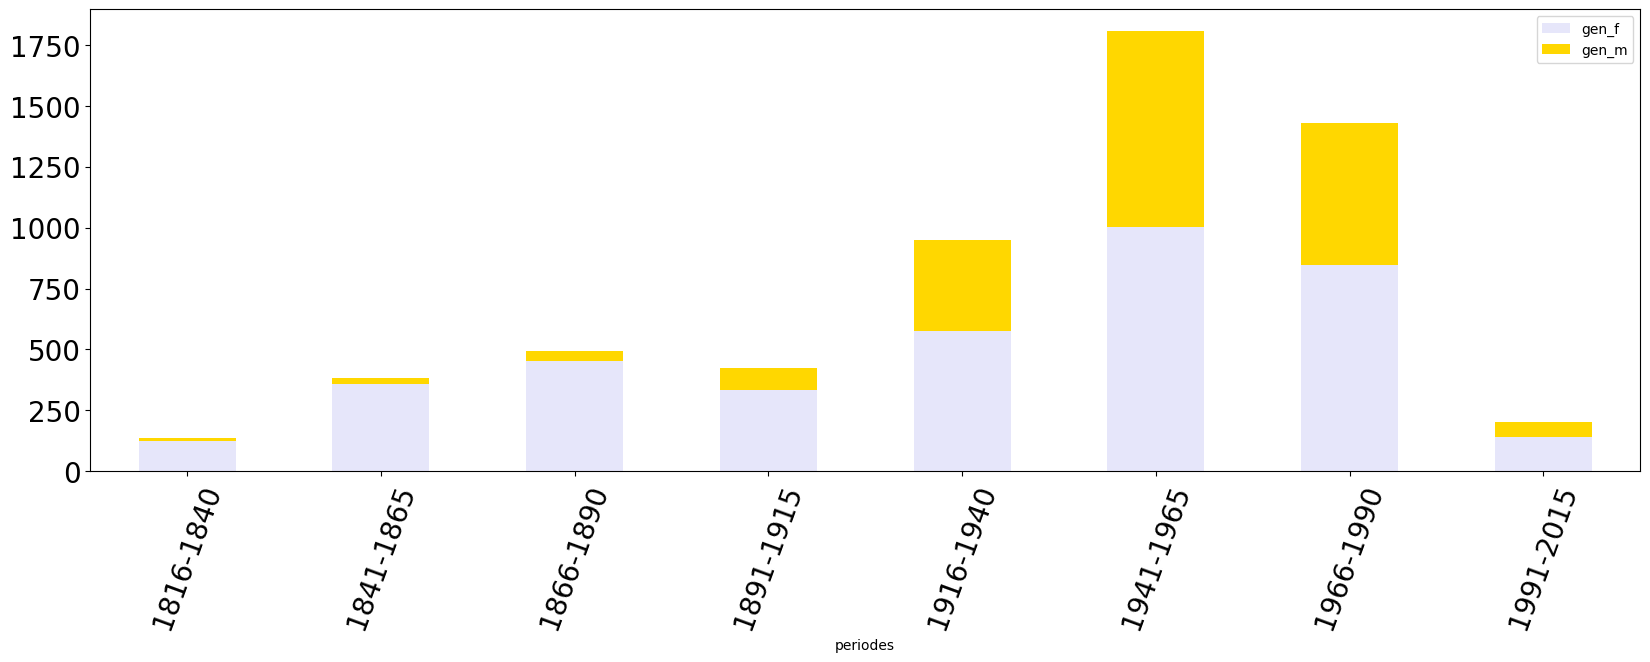

In [124]:
ax = merged.plot.bar(stacked=True, rot=70, fontsize=20, figsize=(20,6), color=['lavender', 'gold'])
plt.show()

### Commentaire
Il y a clairement une proportion plus grande de femmes dans les militant.es. Cependant lors de la seconde moitié du XXIe siècle la tendance tend à s'équilibrer.

In [125]:
l_10 = list(range(1816, 2007, 10))
l_10[:5],l_10[-5:]

([1816, 1826, 1836, 1846, 1856], [1966, 1976, 1986, 1996, 2006])

In [126]:

cdf_p['per_10'] = pd.cut(cdf_p['annee_naissance'], l_10, right=False)

### Transformer le code ajouté pour qu'il soit plus lisible
# noter qu'on a arrondi les valeurs
cdf_p['per_10'] = cdf_p['per_10'].apply(lambda x : str(int(x.left))+'-'+ str(int(x.right)-1))

# Inspection
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840,1816-1825
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840,1816-1825
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840,1816-1825


In [127]:
### On regroupe par genre comme ci-dessus
## Même problème qu'avant ? des périodes disparaissent !!!!!
gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'F') & (cdf_p.annee_naissance > 1815)].groupby('per_10').size())
gender_f_10.columns = ['gen_f']
gender_f_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/2952852462.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_f_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'F') & (cdf_p.annee_naissance > 1815)].groupby('per_10').size())


,gen_f
per_10,
1956-1965,361
1966-1975,345
1976-1985,349
1986-1995,237
1996-2005,54


In [128]:
### Idem
gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'M')& (cdf_p.annee_naissance > 1815)].groupby('per_10').size())
gender_m_10.columns = ['gen_m']
gender_m_10.tail()

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/1017774975.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_m_10 = pd.DataFrame(cdf_p[(cdf_p.gender == 'M')& (cdf_p.annee_naissance > 1815)].groupby('per_10').size())


,gen_m
per_10,
1956-1965,319
1966-1975,284
1976-1985,221
1986-1995,124
1996-2005,16


In [129]:
merged_10 = pd.merge(gender_m_10, gender_f_10, left_index=True, right_index=True)
merged_10.tail()

,gen_m,gen_f
per_10,,
1956-1965,319,361
1966-1975,284,345
1976-1985,221,349
1986-1995,124,237
1996-2005,16,54


In [130]:
### On transforme le type de valeur de l'index
# et on ajoute une colonne avec le total
merged_10.index = merged_10.index.map(str)
merged_10['tot']=merged_10['gen_f']+merged_10['gen_m']
merged_10.tail()

,gen_m,gen_f,tot
per_10,,,
1956-1965,319,361,680
1966-1975,284,345,629
1976-1985,221,349,570
1986-1995,124,237,361
1996-2005,16,54,70


In [131]:
### On prépare les valeurs pour l'affichage des fréquences (proportion par rapport au total)

# liste qui contient toutes les valeurs à la suite
m_m = merged_10.gen_f.to_list()+merged_10.gen_m.to_list()

# liste d'égale longueur que la précédente qui contient 
# les valeurs de l'index, i.e. les périodes
tot = merged_10.tot.to_list()*2

# liste qui contient les valeurs des fréquences
lp = [round(v/t, 2) for v,t in zip(m_m, tot)]
lp[:3]

[0.85, 0.96, 0.91]

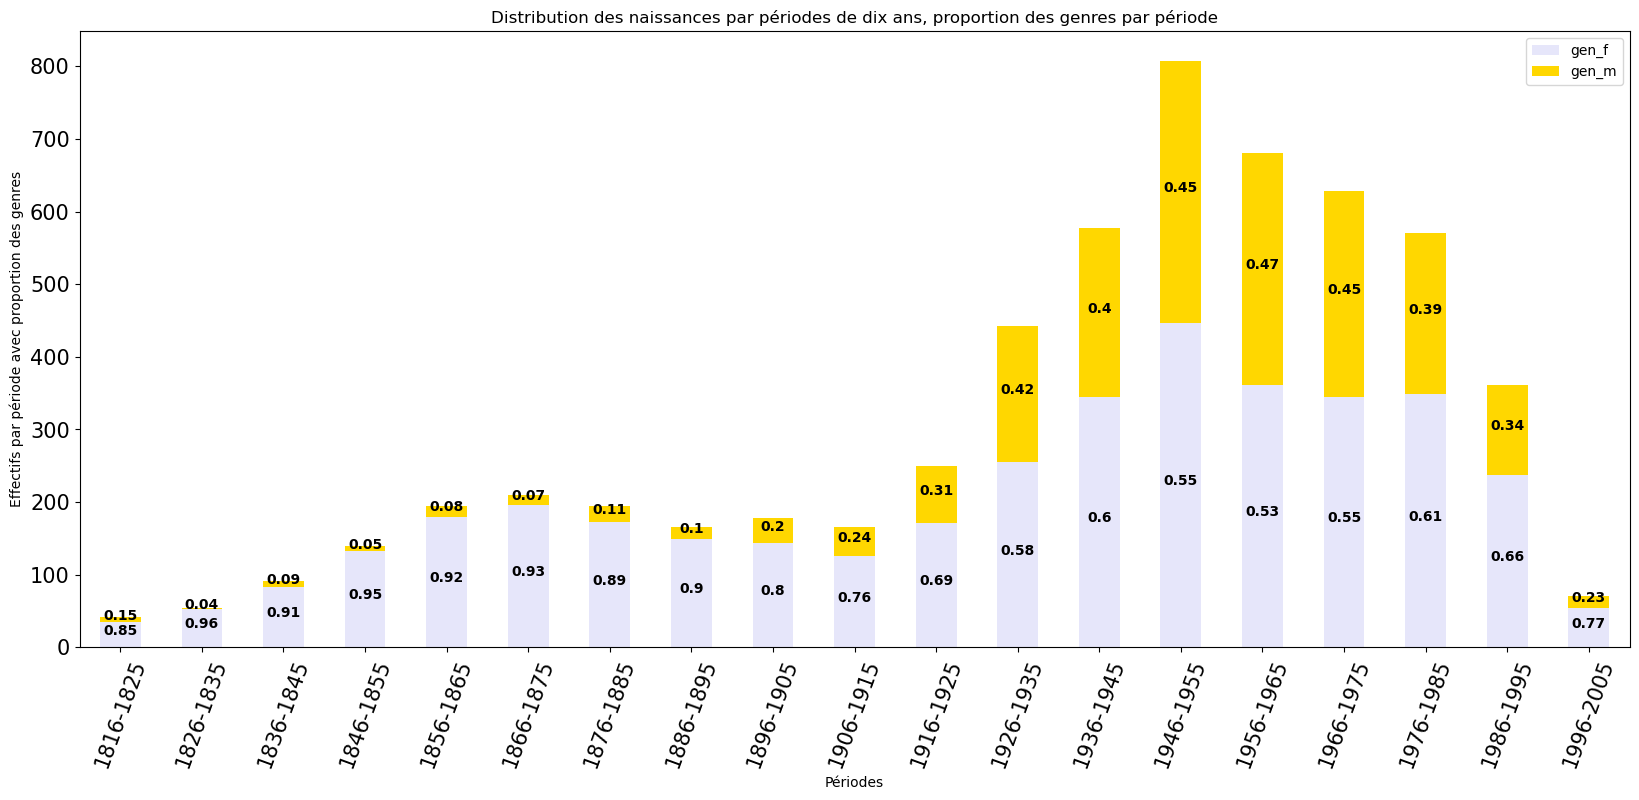

In [132]:
### Graphique avec la distribution par période et genre (M,F)
# Noter que les effectifs du genre 'Autres' étant très faibles,
# on ne les analyse pas de manière sérielle mais on peut les analyser qualitatiement

ax = merged_10.plot.bar(stacked=True, y=['gen_f', 'gen_m'], \
                        rot=70, fontsize=15, figsize=(20,8), color=['lavender', 'gold'])


### https://www.pythoncharts.com/matplotlib/stacked-bar-charts-labels/


## On ajoute une étiquette concernant la valeur de fréquence
# à chaque rectangle dans le graphe, en utilisant la list 'lp' préparée précédemment
# Il y a autant de triangles que les valeurs d'index x le nombre de variables

for bar,v in zip(ax.patches,lp): 

    ax.text(
      # Met les étiquette aux centre des rectangles
      bar.get_x() + bar.get_width() / 2,
        
      # Ajoute les coordonnées verticales
      bar.get_height()/2 + bar.get_y(), 
      
      # Ajoute les valeurs
      v,

      # centre et met du style aux étiquettes
      ha='center',
      color='black',
      weight='bold',
      size=10
  )

plt.ylabel('Effectifs par période avec proportion des genres')
plt.xlabel('Périodes')
plt.title('Distribution des naissances par périodes de dix ans, proportion des genres par période')


plt.show()

# Analyse des spécificités des genres

Dans ce carnet est proposée une analyse des spécificités des genres, en relation avec le temps et la région d'origine.

In [133]:
cdf_p.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10
0,http://www.wikidata.org/entity/Q4962236,Fredrika Limnell,F,Europe,1816,1816-1840,1816-1825
1,http://www.wikidata.org/entity/Q12315607,Hansine Andræ,F,Europe,1817,1816-1840,1816-1825
2,http://www.wikidata.org/entity/Q19403912,Mary Taylor (1817-1893),F,Europe,1817,1816-1840,1816-1825


## Distribution des genres par périodes

In [134]:
X = "periodes"  # "0"
Y = "gender"

ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/1759348793.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ddf = cdf_p[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1816-1840,1841-1865,1866-1890,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015,Total
gender,,,,,,,,,
F,125,357,453,333,576,1002,846,139,3831
LGBTQ,0,0,0,3,11,86,171,54,325
M,13,25,39,89,374,804,582,63,1989
Total,138,382,492,425,961,1892,1599,256,6145


### Commentaire
Ce tableau de contingence démontre qu'il serait plus intéressant d'effectuer une analyse du XXIe siècle, car le XIXe représente peu de personnes et beaucoup de femme. Il n'y a d'ailleurs aucune personne LGBTQIA+. Nous allons donc utiliser les données à partir de la génération de 1891.

In [135]:
### Création d'un tableau de données pour le XXe siècle. 
tab_20 = cdf_p[(cdf_p.annee_naissance > 1890) \
                 & (cdf_p.annee_naissance < 2000)].copy(deep=True)
tab_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5133 entries, 1012 to 6144
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pk               5133 non-null   object  
 1   nom              5133 non-null   object  
 2   gender           5133 non-null   object  
 3   zone_geo         5133 non-null   object  
 4   annee_naissance  5133 non-null   int64   
 5   periodes         5133 non-null   category
 6   per_10           5133 non-null   category
dtypes: category(2), int64(1), object(4)
memory usage: 251.7+ KB


In [136]:
tab_20.head(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10
1012,http://www.wikidata.org/entity/Q101037,Hans Siemsen,M,Europe,1891,1891-1915,1886-1895
1013,http://www.wikidata.org/entity/Q1243468,Marie Delcourt,F,Europe,1891,1891-1915,1886-1895
1014,http://www.wikidata.org/entity/Q15020985,Jeanne Beeckman,F,Europe,1891,1891-1915,1886-1895


In [137]:
tab_20.tail(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999,1991-2015,1996-2005
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999,1991-2015,1996-2005
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999,1991-2015,1996-2005


In [138]:
X = "periodes"  # "0"
Y = "gender"

ddf = tab_20[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

/var/folders/8b/5g0mv7wd0xs17dz5xzhfppjm0000gn/T/ipykernel_22276/402908913.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ddf = tab_20[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)


periodes,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015,Total
gender,,,,,,
F,333,576,1002,846,139,2896
LGBTQ,3,11,86,171,54,325
M,89,374,804,582,63,1912
Total,425,961,1892,1599,256,5133


In [139]:
### Production du tableau pour l'analyse
D = ddf.iloc[:-1,:-1].copy(deep=True)
D

periodes,1891-1915,1916-1940,1941-1965,1966-1990,1991-2015
gender,,,,,
F,333,576,1002,846,139
LGBTQ,3,11,86,171,54
M,89,374,804,582,63


In [140]:
## Nombre de modalités ligne
K = D.shape[0]
## Nombre de modalités colonnes
L = D.shape[1]
# Effectif total
n = np.sum(D.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)

Dimensions: ( 3 , 5 ), effectif: 5133 , nombre max. facteurs: 2


In [141]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
vc = stats.contingency.association(D, method='cramer')
print('Cramer: ', vc)

Chi2 : 310.17694072409773 , dof : 8
p-value : 2.80509801044173e-62
phi2 = inertie (variance totale) : 0.06042800325815269
Cramer:  0.17382175246233236


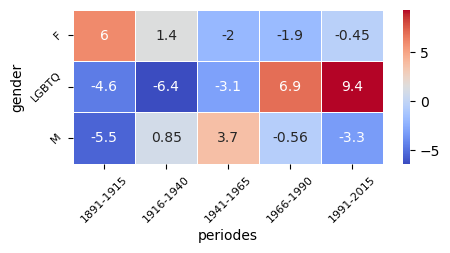

In [142]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index


fig, ax = plt.subplots(figsize=(5,2))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=45, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=45, fontsize=8)

plt.show()

### Commentaire
utilité d'une analyse factorielle ? --> réflexion à mener sur l'utilité de mettre en évidence ou non les LGBTQ

## Distribution des genres par origines XXe siècle

In [143]:
### Tableau de contingence
X = "gender"
Y = "zone_geo"

ddf = cdf_cont[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
ddf

gender,F,LGBTQ,M,Total
zone_geo,,,,
Afrique,336,10,161,507
Amérique du nord,500,124,358,982
Amérique du sud,445,71,193,709
Asie,499,28,434,961
Europe,1039,85,725,1849
Océanie,77,7,41,125
Total,2896,325,1912,5133


In [144]:
B = ddf.iloc[:-1,:-1].copy(deep=True)
B

gender,F,LGBTQ,M
zone_geo,,,
Afrique,336,10,161
Amérique du nord,500,124,358
Amérique du sud,445,71,193
Asie,499,28,434
Europe,1039,85,725
Océanie,77,7,41


In [145]:
## Nombre de modalités ligne
K = B.shape[0]
## Nombre de modalités colonnes
L = B.shape[1]
# Effectif total
n = np.sum(B.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)


Dimensions: ( 6 , 3 ), effectif: 5133 , nombre max. facteurs: 2


In [147]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(B)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
vc = stats.contingency.association(B, method='cramer')
print('Cramer: ', vc)

Chi2 : 183.74138512257193 , dof : 10
p-value : 3.91448892023961e-34
phi2 = inertie (variance totale) : 0.035796100744705225
Cramer:  0.13378359530358203


### Commentaire

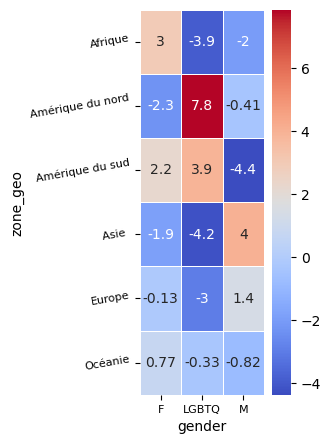

In [148]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((B.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= B.columns
residus_ponderes.index=B.index


fig, ax = plt.subplots(figsize=(2,5))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, 
                cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=0, fontsize=8)
yt = g.set_yticklabels(labelsy, rotation=10, fontsize=8)



plt.show()

### Commentaire

## Analyse du lien entre genre, période et zone géographique

In [149]:
tab_20.periodes = tab_20.periodes.astype("str")
tab_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5133 entries, 1012 to 6144
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pk               5133 non-null   object  
 1   nom              5133 non-null   object  
 2   gender           5133 non-null   object  
 3   zone_geo         5133 non-null   object  
 4   annee_naissance  5133 non-null   int64   
 5   periodes         5133 non-null   object  
 6   per_10           5133 non-null   category
dtypes: category(1), int64(1), object(5)
memory usage: 286.4+ KB


In [150]:
tab_20['gender_period_25'] = tab_20.apply(lambda x: \
                    x.periodes + '_' + x.gender, axis=1)
tab_20.head()

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10,gender_period_25
1012,http://www.wikidata.org/entity/Q101037,Hans Siemsen,M,Europe,1891,1891-1915,1886-1895,1891-1915_M
1013,http://www.wikidata.org/entity/Q1243468,Marie Delcourt,F,Europe,1891,1891-1915,1886-1895,1891-1915_F
1014,http://www.wikidata.org/entity/Q15020985,Jeanne Beeckman,F,Europe,1891,1891-1915,1886-1895,1891-1915_F
1015,http://www.wikidata.org/entity/Q20685422,Carmen Sánchez de Bustamante Calvo,F,Amérique du sud,1891,1891-1915,1886-1895,1891-1915_F
1016,http://www.wikidata.org/entity/Q20859202,Liesbeth Ribbius Peletier,F,Europe,1891,1891-1915,1886-1895,1891-1915_F


In [151]:
tab_20.tail(3)

,pk,nom,gender,zone_geo,annee_naissance,periodes,per_10,gender_period_25
6142,http://www.wikidata.org/entity/Q61997527,Frederika Alexis Cull,F,Asie,1999,1991-2015,1996-2005,1991-2015_F
6143,http://www.wikidata.org/entity/Q64748736,Malak al-Kashif,LGBTQ,Afrique,1999,1991-2015,1996-2005,1991-2015_LGBTQ
6144,http://www.wikidata.org/entity/Q81941579,Aliénor Rougeot,F,Europe,1999,1991-2015,1996-2005,1991-2015_F


In [152]:
tab_20.groupby(by='gender_period_25').size()

gender_period_25
1891-1915_F         333
1891-1915_LGBTQ       3
1891-1915_M          89
1916-1940_F         576
1916-1940_LGBTQ      11
1916-1940_M         374
1941-1965_F        1002
1941-1965_LGBTQ      86
1941-1965_M         804
1966-1990_F         846
1966-1990_LGBTQ     171
1966-1990_M         582
1991-2015_F         139
1991-2015_LGBTQ      54
1991-2015_M          63
dtype: int64

In [153]:
 ### Tableau de contingence
X = "gender_period_25"
Y = "zone_geo"

tab_cont = tab_20[[Y,X]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total").fillna(0).astype(int)
tab_cont

gender_period_25,1891-1915_F,1891-1915_LGBTQ,1891-1915_M,1916-1940_F,1916-1940_LGBTQ,1916-1940_M,1941-1965_F,1941-1965_LGBTQ,1941-1965_M,1966-1990_F,1966-1990_LGBTQ,1966-1990_M,1991-2015_F,1991-2015_LGBTQ,1991-2015_M,Total
zone_geo,,,,,,,,,,,,,,,,
Afrique,19,0,1,43,0,28,122,2,64,116,6,60,36,2,8,507
Amérique du nord,46,1,24,151,5,94,194,38,169,105,59,67,4,21,4,982
Amérique du sud,59,2,9,90,0,27,155,14,88,125,44,61,16,11,8,709
Asie,38,0,18,59,0,55,165,7,163,194,17,183,43,4,15,961
Europe,158,0,36,211,4,162,337,22,295,294,44,206,39,15,26,1849
Océanie,13,0,1,22,2,8,29,3,25,12,1,5,1,1,2,125
Total,333,3,89,576,11,374,1002,86,804,846,171,582,139,54,63,5133


### Commentaire
**Je ne sais pas si cela est pertinent de traiter les 3 variables qualitatives, comme pour les LGBT il n'y en a que 3 dans la génération 1891 et ensuite 11 pour 1916. D'ailleurs l'océanie peut aussi biaiser mais j'essaie avec tout.**

In [154]:
## Tableau utilisé pour l'analyse
T = tab_cont.iloc[0:6,0:15].copy(deep=True)
T

gender_period_25,1891-1915_F,1891-1915_LGBTQ,1891-1915_M,1916-1940_F,1916-1940_LGBTQ,1916-1940_M,1941-1965_F,1941-1965_LGBTQ,1941-1965_M,1966-1990_F,1966-1990_LGBTQ,1966-1990_M,1991-2015_F,1991-2015_LGBTQ,1991-2015_M
zone_geo,,,,,,,,,,,,,,,
Afrique,19,0,1,43,0,28,122,2,64,116,6,60,36,2,8
Amérique du nord,46,1,24,151,5,94,194,38,169,105,59,67,4,21,4
Amérique du sud,59,2,9,90,0,27,155,14,88,125,44,61,16,11,8
Asie,38,0,18,59,0,55,165,7,163,194,17,183,43,4,15
Europe,158,0,36,211,4,162,337,22,295,294,44,206,39,15,26
Océanie,13,0,1,22,2,8,29,3,25,12,1,5,1,1,2


In [155]:
## Nombre de modalités ligne
K = T.shape[0]
## Nombre de modalités colonnes
L = T.shape[1]
# Effectif total
n = np.sum(T.values)
# Nombre max. de facteur
Hmax = np.min([K-1,L-1])

print('Dimensions: (', K, ',', L, '), effectif:', n, ', nombre max. facteurs:', Hmax)


Dimensions: ( 6 , 15 ), effectif: 5133 , nombre max. facteurs: 5


In [156]:
### Valeurs produites par la fonction de la librairie 'stats'
statistic, p, dof, expected = stats.chi2_contingency(T)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 = inertie (variance totale) :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),4)

### Coéfficient de Cramer
vc = stats.contingency.association(T, method='cramer')
print('Cramer: ', vc)

Chi2 : 503.82899575103477 , dof : 70
p-value : 6.761234695406244e-67
phi2 = inertie (variance totale) : 0.09815487935925088
Cramer:  0.14011058443904292


### Commentaire

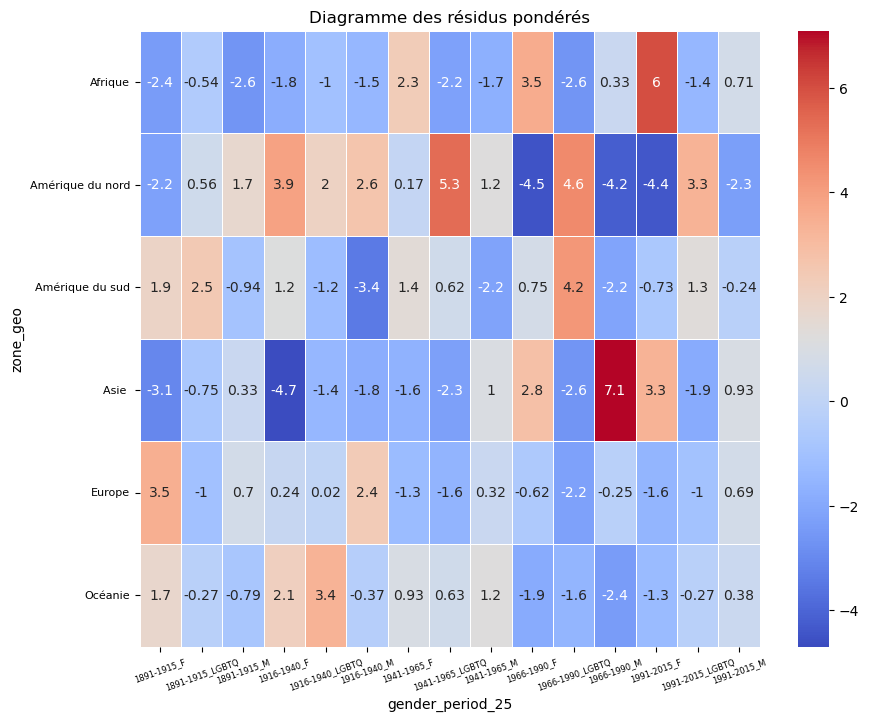

In [157]:
residus_ponderes = (round((T.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= T.columns
residus_ponderes.index=T.index


fig, ax = plt.subplots(figsize=(10,8))         
# Sample figsize in inches
g = sns.heatmap(residus_ponderes, annot=residus_ponderes, 
                cmap="coolwarm", linewidths=.5, ax=ax)
labelsx = residus_ponderes.columns
labelsy = residus_ponderes.index
xt = g.set_xticklabels(labelsx, rotation=20, fontsize=6)
yt = g.set_yticklabels(labelsy, rotation=0, fontsize=8)


g.set_title('Diagramme des résidus pondérés')

plt.show()

### Commentaire

In [158]:
afc = CA(row_labels=T.index,col_labels=T.columns)
afc.fit(T.values)

CA(col_labels=Index(['1891-1915_F', '1891-1915_LGBTQ', '1891-1915_M', '1916-1940_F',
       '1916-1940_LGBTQ', '1916-1940_M', '1941-1965_F', '1941-1965_LGBTQ',
       '1941-1965_M', '1966-1990_F', '1966-1990_LGBTQ', '1966-1990_M',
       '1991-2015_F', '1991-2015_LGBTQ', '1991-2015_M'],
      dtype='object', name='gender_period_25'),
   row_labels=Index(['Afrique', 'Amérique du nord', 'Amérique du sud', 'Asie ', 'Europe',
       'Océanie'],
      dtype='object', name='zone_geo'))

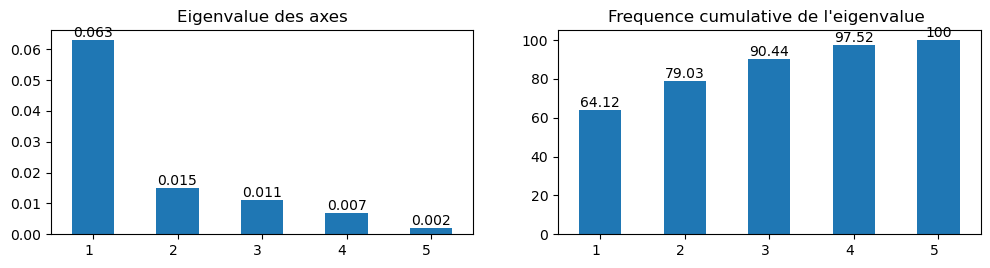

In [159]:
eig = pd.DataFrame(afc.eig_)

r1 = round(eig.iloc[0], 3)
r2 = round(eig.iloc[2], 2)
s=list(range(1,len(r1)+1))
r1.index=s
r2.index=s

# https://www.statology.org/pandas-subplots/
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

ax1 = r1.plot(kind='bar', ax=axes[0], title='Eigenvalue des axes')
ax2 = r2.plot(kind='bar', ax=axes[1], title="Frequence cumulative de l'eigenvalue ")


ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0])


# Met les valeurs xticks en vertical
fig.autofmt_xdate(rotation=0)
plt.show()

### Graphique et interprétation du premier plan factoriel

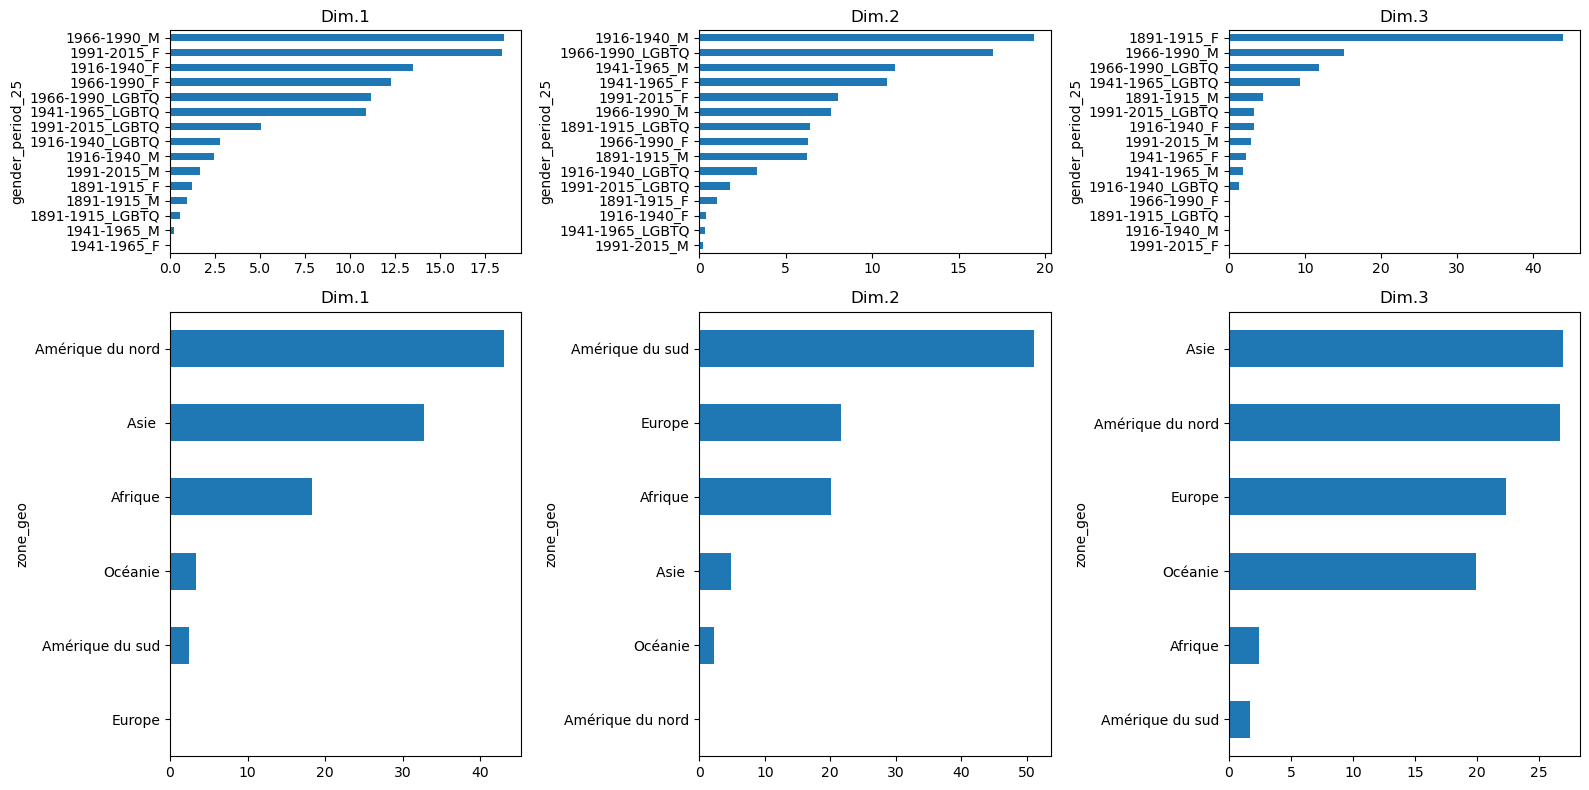

In [164]:
# Informations sur les contributions des colonnes
df = afc.col_topandas()[['col_contrib_dim1',
                         'col_contrib_dim2',
                         'col_contrib_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8),
                          gridspec_kw={'height_ratios': [1, 2]})

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Rows
df = afc.row_topandas()[['row_contrib_dim1',
                         'row_contrib_dim2',
                         'row_contrib_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

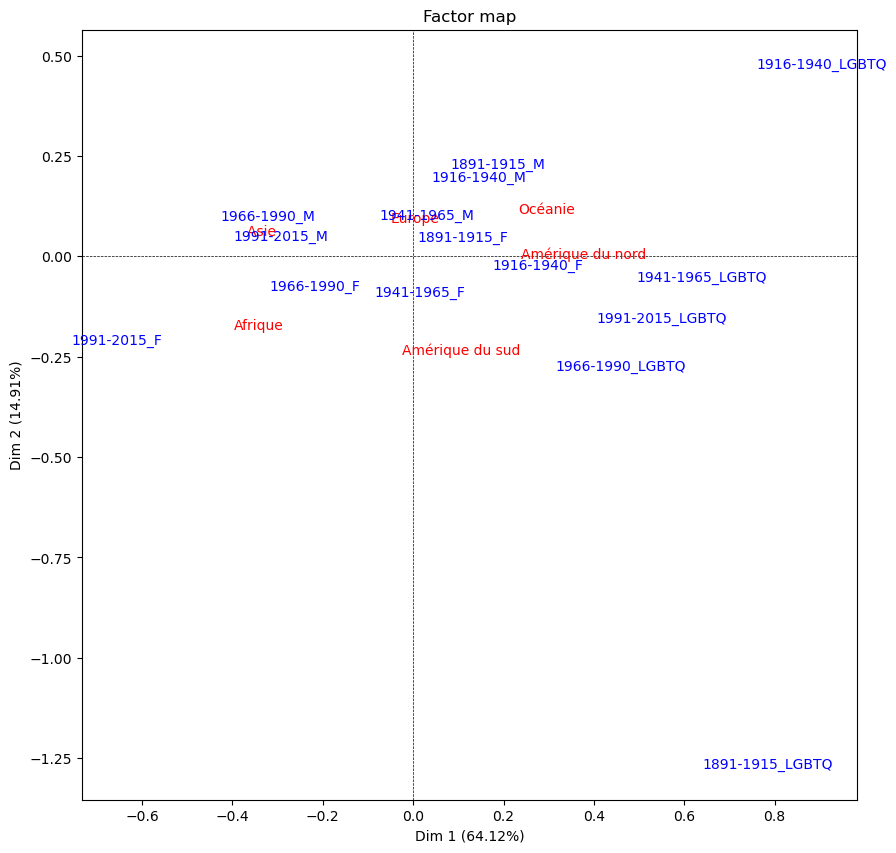

In [165]:

# Représentation simultanée, avec amplification
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(10,10))

### Représentation de l'autre plan factoriel

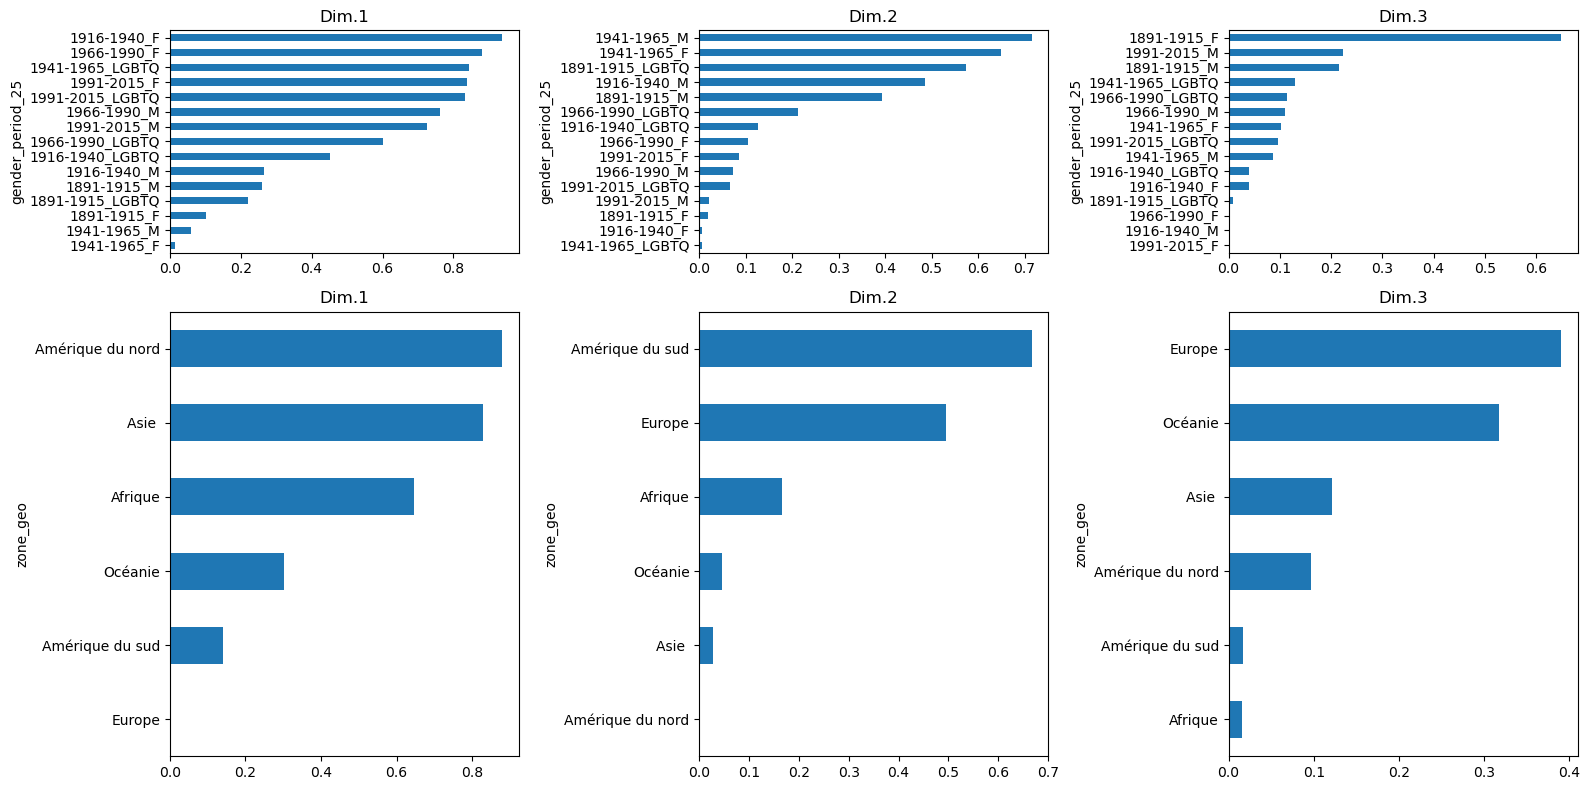

In [166]:
### Colonnes
df = afc.col_topandas()[['col_cos2_dim1',
                         'col_cos2_dim2',
                         'col_cos2_dim3']]

r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8), 
                         gridspec_kw={'height_ratios': [1, 2]})

r1.sort_values().plot(kind='barh', ax=axes[0,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[0,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[0,2], title='Dim.3')

### Lignes
df = afc.row_topandas()[['row_cos2_dim1',
                         'row_cos2_dim2',
                         'row_cos2_dim3']]
r1 = df.iloc[:,0]
r2 = df.iloc[:,1]
r3 = df.iloc[:,2]

r1.sort_values().plot(kind='barh', ax=axes[1,0], title='Dim.1')
r2.sort_values().plot(kind='barh', ax=axes[1,1], title='Dim.2')
r3.sort_values().plot(kind='barh', ax=axes[1,2], title='Dim.3')

plt.tight_layout()
plt.show()

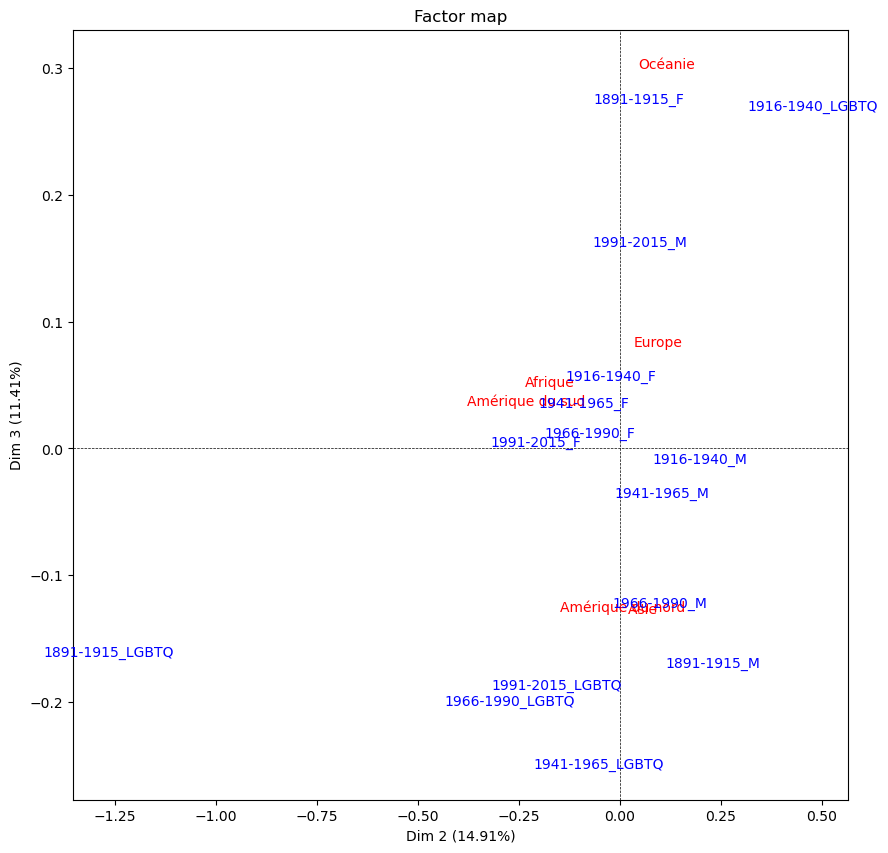

In [167]:
afc.mapping(num_x_axis=2,num_y_axis=3,figsize=(10,10))

### Commentaire